<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

In [29]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [30]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [35]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
df_Eolicas  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
df_Eolicas.dropna(inplace=True)
df_Eolicas = df_Eolicas.iloc[:3000, :]
df_Eolicas.head()


,EOL1,EOL2,EOL3,EOL4,EOL5,EOL6,EOL7,EOL8,EOL9,EOL10,...,EOL27,EOL28,EOL29,EOL30,EOL31,EOL32,EOL33,EOL34,EOL35,EOL36
0,1.73,0.636,0.0,0.0,0.56,0.28,0.49,0.72,0.63,0.62,...,0.84,0.39,1.41,0.30,0.21,3.70,13.43,12.41,1.8,2.3
1,1.80,0.627,0.0,0.0,0.56,0.25,0.49,0.71,0.64,0.67,...,0.89,0.38,2.00,0.32,0.27,3.70,13.43,12.41,1.8,2.3
2,1.77,0.642,0.0,0.0,0.56,0.17,0.45,0.69,0.63,0.63,...,0.84,0.38,27.74,0.32,0.31,3.70,13.43,12.41,1.8,2.3
3,1.77,0.662,0.0,0.0,0.56,0.44,0.14,0.73,0.65,0.64,...,0.83,0.40,55.31,0.32,0.30,3.67,13.43,12.41,1.8,2.3
4,1.45,0.653,0.0,0.0,0.55,0.50,0.18,0.70,0.64,0.66,...,0.84,0.38,63.45,0.32,0.27,0.00,13.43,12.41,1.8,2.3


In [36]:
X = df_Eolicas.to_numpy()
X = StandardScaler().fit_transform(X)

95.06125307542587


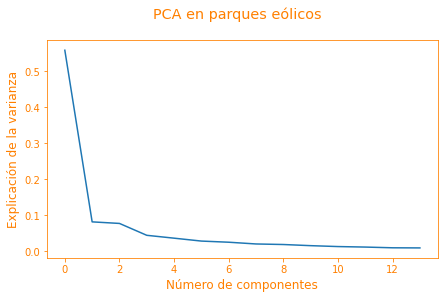

In [37]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(.95) 
pca.fit(X)
x_pca = pca.transform(X)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en parques eólicos  \n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')

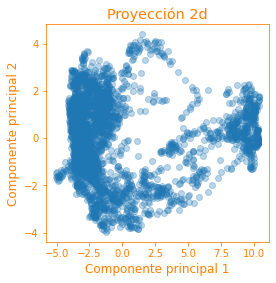

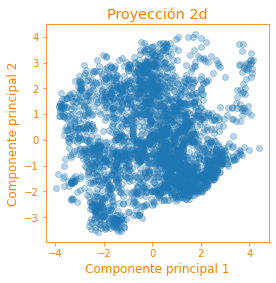

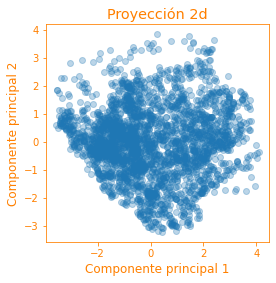

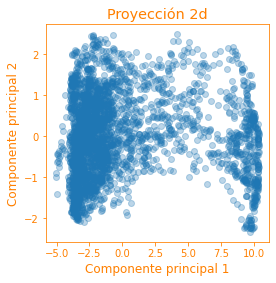

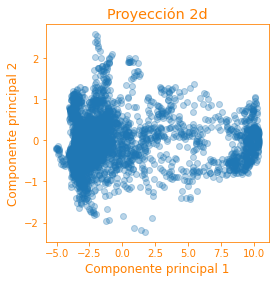

In [38]:
## Proyección de 10 dimensiones 
pca = PCA(n_components = 12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',])
scatterplot(principalDf['PC1'],principalDf['PC2'],'Proyección 2d','fig_t14_Proy2D_1_2')
scatterplot(principalDf['PC2'],principalDf['PC3'],'Proyección 2d','fig_t14_Proy2D_2_3')
scatterplot(principalDf['PC3'],principalDf['PC4'],'Proyección 2d','fig_t14_Proy2D_3_4')
scatterplot(principalDf['PC1'],principalDf['PC6'],'Proyección 2d','fig_t14_Proy2D_1_6')
scatterplot(principalDf['PC1'],principalDf['PC12'],'Proyección 2d','fig_t14_Proy2D_1_12')

In [39]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html?highlight=factor%20analysis#
factor = FactorAnalysis(n_components=2, random_state=0)
X_factor = factor.fit_transform(X)
X_factor.shape

(3000, 2)

[link text](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

Análisis de componentes principales es un métodos de reducción de dimensiones que puede ser usado paraescoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras. Además otras variables isntéticas llamadas latentes o componentes en el PCA pueden explicar partes importantes del fenómeno. 